# Coursera
### Wesleyan University Data Analysis and Interpretation Specialization

Course 4: Machine Learning for Data Analysis<br>
Week 2: Running a Random Forest<br>
Author: Matt Clark


### Instructions:
<blockquote>
The second assignment deals with Random Forests. Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

Run a Random Forest.

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to run a Random Forest (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. Please note that your reviewers should NOT be required to download any files in order to complete the review.

Review criteria
less 
Your assessment will be based on the evidence you provide that you have completed all of the steps. In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing.
</blockquote>

### Data Preparation:

#### Import libraries.

In [1]:
from pandas import Series, DataFrame
import os
# from sklearn.cross_validation import train_test_split - deprecated, use sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import pandas as pd
import numpy as np
import seaborn as sb
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pathlib import Path

 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

#### Dataframe generation.

In [2]:
root_dir = Path().resolve().parents[1]
df = pd.read_csv(str(root_dir)+'/ool_pds.csv', low_memory=False)

#### Coerce predictor variables into numeric format.

In [3]:
# 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2'

df['PPEDUCAT'] = df['PPEDUCAT'].apply(pd.to_numeric, errors='coerce' )
df['W1_A1'] = df['W1_A1'].apply(pd.to_numeric, errors='coerce' )
df['W1_A5A'] = df['W1_A5A'].apply(pd.to_numeric, errors='coerce' )
df['W1_C1'] = df['W1_C1'].apply(pd.to_numeric, errors='coerce' )
df['W1_M2'] = df['W1_M2'].apply(pd.to_numeric, errors='coerce' )

#### Remove invalid entries (-1, np.nan) from data.

In [4]:
# Map -1 (refused to respond) to np.nan
# dropna

df1 = df.replace(-1,np.nan).dropna()

#### Dichotomize response variable W1_F6.

In [5]:
# Dichotomize response variable W1_F6
# We expclude the -1 refusals to respond, and categorize 0-5: less optimistic, 6-10: more optimistic

di_w1_f6 = {-1: np.nan, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}
df2 = df1.replace({"W1_F6": di_w1_f6}).dropna() # use the dictionary to drop NA values and replace numeric values with binary.


#### Save clean data to CSV.

In [6]:
# df2.to_csv(str(root_dir)+'/tree_ool_pds.csv')

### Create Random Forest:

#### Train, Test, Split.

In [7]:
predictors = df2[['PPEDUCAT', 'W1_A1', 'W1_A5A', 'W1_C1', 'W1_C2']]

targets = df2.W1_F6

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(308,)

#### Build model on training data.

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

0.6753246753246753

#### Fit another trees model to the data.

In [9]:
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)

ExtraTreesClassifier()

#### Display the relative importance of each attribute.

In [10]:
print(model.feature_importances_)

[0.22768493 0.22870468 0.0737382  0.1120669  0.35780528]


### Run a different number of trees to observe the effect on the accuracy of the prediction:

In [11]:
trees=range(25)
accuracy=np.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

### Plot accuracy against $n_{trees}$ to assess the importance of the size of the forest:

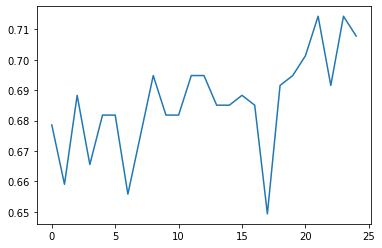

In [12]:
plt.cla()
plt.plot(trees, accuracy)

### Summary:
The ExtraTreesClassifier().feature_importances_ yielded the vector $\begin{pmatrix} 0.21574349 & 0.24542427 & 0.07431517 &  0.12502405 & 0.33949302 \end{pmatrix}$, supprisingly indicating that among the variables in this model, the factor most strongly associated with Economic Optimism (as measured by how nearly a respondent thought they would achieve the American Dream) is identification with conservative political ideology, while the least significant factor with less than $\frac{1}{4}$ the level of correspondence, is which presidential candidate the respondent voted for in 2012. Identification of confounding between variables in a random forrest model may bear investigation in a future assignment.

#### A final note on this assignment.
It may be the case that the purpose of this lesson is to demonstrate the power of available tools to the student, which I can appreciate. But I make no claim to understanding this model, having only applied it to the dataset that I have been working with throughout this course. The recommended time to complete this assignment was 1 hour. Considering this is presented as an introductory course, I claim that many tens of more hours would be required for someone with no familiarity to develop something like a nuanced understanding of the models that we're using from the scikit-learn libraries, which I hope to further investigate and utililze in the future.
